<h1 align="center">DELHI HOUSE RENT PREDICTION MODEL</h1>

Dataset: https://www.kaggle.com/datasets/andynath/new-delhi-rental-listings

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv("ND_rental_data.csv")

In [3]:
df1.head()

,Unnamed: 0,size_sq_ft,propertyType,bedrooms,latitude,longitude,localityName,suburbName,cityName,price,companyName,closest_mtero_station_km,AP_dist_km,Aiims_dist_km,NDRLW_dist_km
0,0,400,Independent Floor,1,28.641010,77.284386,Swasthya Vihar,Delhi East,Delhi,9000,Dream Homez,0.577495,21.741188,11.119239,6.227231
1,1,1050,Apartment,2,28.594969,77.298668,mayur vihar phase 1,Delhi East,Delhi,20000,Rupak Properties Stock,0.417142,21.401856,9.419061,9.217502
2,2,2250,Independent Floor,2,28.641806,77.293922,Swasthya Vihar,Delhi East,Delhi,28000,Aashiyana Real Estate,0.125136,22.620365,11.829486,7.159184
3,3,1350,Independent Floor,2,28.644363,77.293228,Krishna Nagar,Delhi East,Delhi,28000,Shivam Real Estate,0.371709,22.681201,11.982708,7.097348
4,4,450,Apartment,2,28.594736,77.311150,New Ashok Nagar,Delhi East,Delhi,12500,Shree Properties,1.087760,22.592810,10.571573,10.263271


In [4]:
df2 = df1.drop('Unnamed: 0', axis='columns')
df2.head()

,size_sq_ft,propertyType,bedrooms,latitude,longitude,localityName,suburbName,cityName,price,companyName,closest_mtero_station_km,AP_dist_km,Aiims_dist_km,NDRLW_dist_km
0,400,Independent Floor,1,28.641010,77.284386,Swasthya Vihar,Delhi East,Delhi,9000,Dream Homez,0.577495,21.741188,11.119239,6.227231
1,1050,Apartment,2,28.594969,77.298668,mayur vihar phase 1,Delhi East,Delhi,20000,Rupak Properties Stock,0.417142,21.401856,9.419061,9.217502
2,2250,Independent Floor,2,28.641806,77.293922,Swasthya Vihar,Delhi East,Delhi,28000,Aashiyana Real Estate,0.125136,22.620365,11.829486,7.159184
3,1350,Independent Floor,2,28.644363,77.293228,Krishna Nagar,Delhi East,Delhi,28000,Shivam Real Estate,0.371709,22.681201,11.982708,7.097348
4,450,Apartment,2,28.594736,77.311150,New Ashok Nagar,Delhi East,Delhi,12500,Shree Properties,1.087760,22.592810,10.571573,10.263271


In [5]:
df2.shape

(17890, 14)

In [6]:
df2.duplicated().sum()

0

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17890 entries, 0 to 17889
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   size_sq_ft                17890 non-null  int64  
 1   propertyType              17890 non-null  object 
 2   bedrooms                  17890 non-null  int64  
 3   latitude                  17890 non-null  float64
 4   longitude                 17890 non-null  float64
 5   localityName              17890 non-null  object 
 6   suburbName                17890 non-null  object 
 7   cityName                  17890 non-null  object 
 8   price                     17890 non-null  int64  
 9   companyName               17890 non-null  object 
 10  closest_mtero_station_km  17890 non-null  float64
 11  AP_dist_km                17890 non-null  float64
 12  Aiims_dist_km             17890 non-null  float64
 13  NDRLW_dist_km             17890 non-null  float64
dtypes: flo

In [8]:
df2.isna().sum()

size_sq_ft                  0
propertyType                0
bedrooms                    0
latitude                    0
longitude                   0
localityName                0
suburbName                  0
cityName                    0
price                       0
companyName                 0
closest_mtero_station_km    0
AP_dist_km                  0
Aiims_dist_km               0
NDRLW_dist_km               0
dtype: int64

In [9]:
df2["suburbName"].unique()

array(['Delhi East', 'Rohini', 'Delhi South', 'West Delhi', 'North Delhi',
       'Dwarka', 'Delhi Central', 'Other', 'South West Delhi',
       'Delhi North', 'North West Delhi', 'Delhi West'], dtype=object)

In [10]:
df2['suburbName'].value_counts()

suburbName
Delhi South         3749
Delhi Central       2732
Other               2706
Dwarka              2435
West Delhi          2222
Delhi East          1933
North Delhi         1252
Delhi West           314
Rohini               274
Delhi North          176
South West Delhi      86
North West Delhi      11
Name: count, dtype: int64

In [11]:
df3 = df2.copy()
df3["suburbName"].replace("Rohini","North West Delhi", inplace=True)
df3["suburbName"].replace("Dwarka","South West Delhi", inplace=True)
df3["suburbName"].replace("Delhi East","East Delhi", inplace=True)
df3["suburbName"].replace("Delhi South","South Delhi", inplace=True)
df3["suburbName"].replace("Delhi Central","Central Delhi", inplace=True)
df3["suburbName"].replace("Delhi North","North Delhi", inplace=True)
df3["suburbName"].replace("Delhi West","West Delhi", inplace=True)

In [12]:
df3["suburbName"].value_counts()

suburbName
South Delhi         3749
Central Delhi       2732
Other               2706
West Delhi          2536
South West Delhi    2521
East Delhi          1933
North Delhi         1428
North West Delhi     285
Name: count, dtype: int64

In [13]:
df3['bedrooms'].unique()

array([ 1,  2,  3,  4,  5,  6,  7, 10, 15, 12,  8,  9], dtype=int64)

In [14]:
df3['bedrooms'].value_counts()

bedrooms
2     5902
3     5532
1     5214
4     1127
5       79
6       17
10      10
7        3
8        2
9        2
15       1
12       1
Name: count, dtype: int64

In [15]:
df3[df3.bedrooms>7]

,size_sq_ft,propertyType,bedrooms,latitude,longitude,localityName,suburbName,cityName,price,companyName,closest_mtero_station_km,AP_dist_km,Aiims_dist_km,NDRLW_dist_km
3352,4500,Independent House,10,28.567463,77.269135,New Friends Colony,South Delhi,Delhi,400000,Moneytree real estate consultants,1.012889,18.102605,6.000900,9.493981
3525,4050,Independent House,10,28.516312,77.154984,Vasant Kunj,South Delhi,Delhi,330000,Moneytree real estate consultants,1.990471,8.101769,7.622883,15.311770
4340,4500,Independent House,10,28.574039,77.279091,New Friends Colony,South Delhi,Delhi,350000,Dinesh associates,1.534235,19.140507,7.019701,9.425803
4393,9000,Independent House,10,28.561720,77.251312,East of Kailash,South Delhi,Delhi,350000,Moneytree real estate consultants,0.547800,16.323059,4.294829,9.356175
4394,4500,Independent House,10,28.558449,77.202934,Green Park,South Delhi,Delhi,400000,Moneytree real estate consultants,0.358507,11.578610,1.047019,9.388872
4789,9000,Villa,10,28.571875,77.264023,Maharani Bagh,South Delhi,Delhi,500000,Dinesh associates,0.549616,17.649010,5.528280,8.822775
9143,12000,Apartment,10,28.695364,77.153549,Pitampura,North Delhi,Delhi,450000,Sach Consultant,0.122005,16.962323,15.198109,8.857667
13867,15515,Villa,15,28.612860,77.229309,India Gate,Central Delhi,Delhi,4011010,B Kumar and Brothers,1.161003,15.539098,5.514984,3.305361
13868,16521,Independent House,10,28.620640,77.236961,Tilak Marg,Central Delhi,Delhi,3746419,B Kumar and Brothers,0.613982,16.583522,6.607508,2.824245
13972,15562,Independent House,12,28.602797,77.219681,Aurungzeb Road,Central Delhi,Delhi,5885646,B Kumar and Brothers,0.803119,14.234746,4.148746,4.312804


In [16]:
df4 = df3.copy()
df4['price_per_sqft'] = df4['price']/df3['size_sq_ft']
df4.head()

,size_sq_ft,propertyType,bedrooms,latitude,longitude,localityName,suburbName,cityName,price,companyName,closest_mtero_station_km,AP_dist_km,Aiims_dist_km,NDRLW_dist_km,price_per_sqft
0,400,Independent Floor,1,28.641010,77.284386,Swasthya Vihar,East Delhi,Delhi,9000,Dream Homez,0.577495,21.741188,11.119239,6.227231,22.500000
1,1050,Apartment,2,28.594969,77.298668,mayur vihar phase 1,East Delhi,Delhi,20000,Rupak Properties Stock,0.417142,21.401856,9.419061,9.217502,19.047619
2,2250,Independent Floor,2,28.641806,77.293922,Swasthya Vihar,East Delhi,Delhi,28000,Aashiyana Real Estate,0.125136,22.620365,11.829486,7.159184,12.444444
3,1350,Independent Floor,2,28.644363,77.293228,Krishna Nagar,East Delhi,Delhi,28000,Shivam Real Estate,0.371709,22.681201,11.982708,7.097348,20.740741
4,450,Apartment,2,28.594736,77.311150,New Ashok Nagar,East Delhi,Delhi,12500,Shree Properties,1.087760,22.592810,10.571573,10.263271,27.777778


In [17]:
df5 = df4.drop(['latitude','longitude','cityName','companyName','suburbName'], axis='columns')
df5.head()

,size_sq_ft,propertyType,bedrooms,localityName,price,closest_mtero_station_km,AP_dist_km,Aiims_dist_km,NDRLW_dist_km,price_per_sqft
0,400,Independent Floor,1,Swasthya Vihar,9000,0.577495,21.741188,11.119239,6.227231,22.500000
1,1050,Apartment,2,mayur vihar phase 1,20000,0.417142,21.401856,9.419061,9.217502,19.047619
2,2250,Independent Floor,2,Swasthya Vihar,28000,0.125136,22.620365,11.829486,7.159184,12.444444
3,1350,Independent Floor,2,Krishna Nagar,28000,0.371709,22.681201,11.982708,7.097348,20.740741
4,450,Apartment,2,New Ashok Nagar,12500,1.087760,22.592810,10.571573,10.263271,27.777778


In [18]:
df5.describe()

,size_sq_ft,bedrooms,price,closest_mtero_station_km,AP_dist_km,Aiims_dist_km,NDRLW_dist_km,price_per_sqft
count,17890.000000,17890.000000,1.789000e+04,17890.000000,17890.000000,17890.000000,17890.000000,17890.000000
mean,1176.342091,2.168865,3.345196e+04,0.931495,13.727784,11.238134,11.421994,26.338014
std,873.751044,0.971414,8.802054e+04,8.287856,11.357063,11.167202,11.063323,18.787152
min,100.000000,1.000000,1.200000e+03,0.000692,1.784779,0.634508,0.722023,2.608696
25%,620.000000,1.000000,1.350000e+04,0.457782,11.018715,7.769267,7.986813,17.777778
50%,900.000000,2.000000,2.200000e+04,0.698560,13.184035,10.515524,11.015571,22.222222
75%,1600.000000,3.000000,3.500000e+04,1.087740,17.163502,15.514042,15.192483,29.411765
max,16521.000000,15.000000,5.885646e+06,1096.479453,1109.894053,1115.621439,1123.778457,400.000000


In [19]:
df5[df5.price<1500]

,size_sq_ft,propertyType,bedrooms,localityName,price,closest_mtero_station_km,AP_dist_km,Aiims_dist_km,NDRLW_dist_km,price_per_sqft
8917,220,Independent Floor,1,Dr Mukherji Nagar,1200,0.425452,20.308545,14.914225,6.710688,5.454545


In [20]:
locality_count = df5['localityName'].value_counts()
locality_count

localityName
Patel Nagar              1448
Paschim Vihar             949
Chattarpur                826
Pitampura                 609
mayur vihar phase 1       523
                         ... 
Sector-D Vasant Kunj        1
Pocket 7 Sector D           1
Shanti Kunj Main Road       1
Pocket 9 Sector B           1
Jhandewalan                 1
Name: count, Length: 781, dtype: int64

In [21]:
len(locality_count[locality_count<=5])

522

In [22]:
locality_count_less_than_5 = locality_count[locality_count<=5]
locality_count_less_than_5

localityName
Shiksha Bharti School Road    5
Pitampura near NSP            5
Hastsal                       5
Bahapur                       5
Mahipalpur Extention          5
                             ..
Sector-D Vasant Kunj          1
Pocket 7 Sector D             1
Shanti Kunj Main Road         1
Pocket 9 Sector B             1
Jhandewalan                   1
Name: count, Length: 522, dtype: int64

In [23]:
df5['localityName'] = df5['localityName'].apply(lambda x: 'other' if x in locality_count_less_than_5 else x)
df5['localityName'].value_counts()

localityName
Patel Nagar                  1448
other                         980
Paschim Vihar                 949
Chattarpur                    826
Pitampura                     609
                             ... 
A 2 Block                       6
Sector 24 Rohini                6
Mandawali                       6
Pitampura KP Block              6
Block AP Poorvi Pitampura       6
Name: count, Length: 260, dtype: int64

In [24]:
df5.head()

,size_sq_ft,propertyType,bedrooms,localityName,price,closest_mtero_station_km,AP_dist_km,Aiims_dist_km,NDRLW_dist_km,price_per_sqft
0,400,Independent Floor,1,Swasthya Vihar,9000,0.577495,21.741188,11.119239,6.227231,22.500000
1,1050,Apartment,2,mayur vihar phase 1,20000,0.417142,21.401856,9.419061,9.217502,19.047619
2,2250,Independent Floor,2,Swasthya Vihar,28000,0.125136,22.620365,11.829486,7.159184,12.444444
3,1350,Independent Floor,2,Krishna Nagar,28000,0.371709,22.681201,11.982708,7.097348,20.740741
4,450,Apartment,2,New Ashok Nagar,12500,1.087760,22.592810,10.571573,10.263271,27.777778


In [25]:
locality_dummy = pd.get_dummies(df5.localityName, dtype=int)
locality_dummy.head()

,72 Sector 23 Road,944 B Block Road,A 2 Block,A1 Block Paschim Vihar Delhi,A4 Block Paschim Vihar,AGCR Enclave,Abul Fazal Enclave Jamia Nagar,Adchini,Alaknanda,Amar colony,...,dwarka sector 17,greater kailash Enclave 1,i p extension patparganj,laxmi nagar,laxmi nagar near metro station,mayur vihar phase 1,nawada,other,rohini sector 5,vikaspuri
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
property_dummy = pd.get_dummies(df5.propertyType, dtype=int)
property_dummy.head()

,Apartment,Independent Floor,Independent House,Villa
0,0,1,0,0
1,1,0,0,0
2,0,1,0,0
3,0,1,0,0
4,1,0,0,0


In [27]:
df6 = pd.concat([df5,property_dummy,locality_dummy], axis='columns')
df6.head()

,size_sq_ft,propertyType,bedrooms,localityName,price,closest_mtero_station_km,AP_dist_km,Aiims_dist_km,NDRLW_dist_km,price_per_sqft,...,dwarka sector 17,greater kailash Enclave 1,i p extension patparganj,laxmi nagar,laxmi nagar near metro station,mayur vihar phase 1,nawada,other,rohini sector 5,vikaspuri
0,400,Independent Floor,1,Swasthya Vihar,9000,0.577495,21.741188,11.119239,6.227231,22.500000,...,0,0,0,0,0,0,0,0,0,0
1,1050,Apartment,2,mayur vihar phase 1,20000,0.417142,21.401856,9.419061,9.217502,19.047619,...,0,0,0,0,0,1,0,0,0,0
2,2250,Independent Floor,2,Swasthya Vihar,28000,0.125136,22.620365,11.829486,7.159184,12.444444,...,0,0,0,0,0,0,0,0,0,0
3,1350,Independent Floor,2,Krishna Nagar,28000,0.371709,22.681201,11.982708,7.097348,20.740741,...,0,0,0,0,0,0,0,0,0,0
4,450,Apartment,2,New Ashok Nagar,12500,1.087760,22.592810,10.571573,10.263271,27.777778,...,0,0,0,0,0,0,0,0,0,0


In [28]:
df7 = df6.drop(['localityName','propertyType','AP_dist_km','Aiims_dist_km','NDRLW_dist_km'], axis='columns')
df7.head()

,size_sq_ft,bedrooms,price,closest_mtero_station_km,price_per_sqft,Apartment,Independent Floor,Independent House,Villa,72 Sector 23 Road,...,dwarka sector 17,greater kailash Enclave 1,i p extension patparganj,laxmi nagar,laxmi nagar near metro station,mayur vihar phase 1,nawada,other,rohini sector 5,vikaspuri
0,400,1,9000,0.577495,22.500000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1050,2,20000,0.417142,19.047619,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2250,2,28000,0.125136,12.444444,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1350,2,28000,0.371709,20.740741,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,450,2,12500,1.087760,27.777778,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## MODEL BUILDING

In [29]:
df7.shape

(17890, 269)

In [30]:
X = df7.drop('price', axis='columns')
y = df7.price

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

### 1. Linear Regression Model

In [57]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
lin_reg.score(X_test,y_test)

0.5849923415573208

In [61]:
from sklearn.model_selection import cross_val_score

lin_cv=cross_val_score(lin_reg,X_train,y_train,cv=5)
print(lin_cv)

[0.51678536 0.49196858 0.60403899 0.5568547  0.06479602]


In [62]:
lin_cv.mean()

0.4468887303284399

In [60]:
# R2_score
lin_predict = lin_reg.predict(X_test)

from sklearn.metrics import r2_score
r2_score(lin_predict,y_test)

0.42937847435126564

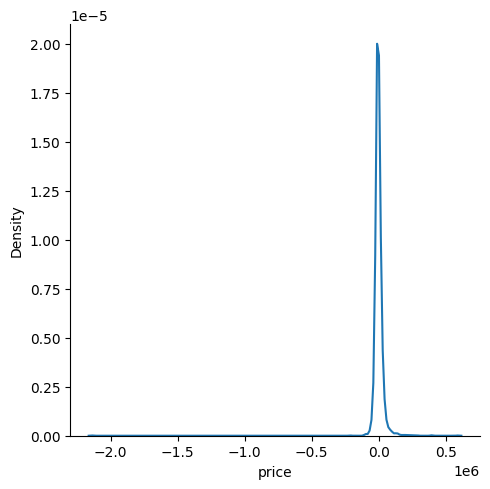

In [63]:
# Residual distribution plot

sns.displot(lin_predict-y_test, kind='kde')

### 2. Random Forest Model

In [109]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=10)
forest_reg.fit(X_train,y_train)
forest_reg.score(X_test,y_test)

0.8594498916412872

In [124]:
#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

param_forest = {"max_depth":[10,20,30,40,50,60],
                "max_features":["auto","sqrt","log2","None"]
               }
grid_forest = GridSearchCV(forest_reg,param_grid=param_forest,cv=5,scoring='r2')
grid_forest.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=10),
             param_grid={'max_depth': [10, 20, 30, 40, 50, 60],
                         'max_features': ['auto', 'sqrt', 'log2', 'None']},
             scoring='r2')

In [125]:
print(grid_forest.best_params_)

{'max_depth': 50, 'max_features': 'sqrt'}


In [126]:
print(grid_forest.best_score_)

0.7900209379977929


In [127]:
y_forest_pred=grid_forest.predict(X_test)
r2_score(y_test,y_forest_pred)

0.8706808125563453

### 3. Ridge Regression

In [66]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_S = scaler.fit_transform(X_train)
X_test_S = scaler.transform(X_test)

In [67]:
ridge_reg = Ridge()

In [85]:
parameters = {'alpha':[100,150,200,300,400,500,600,700,800,900,1000,1200,1500,2000,3000,4000,5000]}
ridge_cv = GridSearchCV(ridge_reg,parameters,scoring='r2',cv=5)
ridge_cv.fit(X_train_S,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [100, 150, 200, 300, 400, 500, 600, 700, 800,
                                   900, 1000, 1200, 1500, 2000, 3000, 4000,
                                   5000]},
             scoring='r2')

In [86]:
print(ridge_cv.best_params_)

{'alpha': 4000}


In [87]:
print(ridge_cv.best_score_)

0.5716165850153127


In [90]:
ridge_reg1 = Ridge(alpha=4000)

ridge_reg1.fit(X_train_S,y_train)
ridge_reg1.score(X_test_S,y_test)

0.5392575874319196

### 4. Lasso Regression

In [77]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso()

In [105]:
parameters = {'alpha':[100,500,1000,10000,12000,14000,15000,17000,19000]}
lasso_cv = GridSearchCV(lasso_reg,parameters,scoring='r2',cv=5)
lasso_cv.fit(X_train_S,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [100, 500, 1000, 10000, 12000, 14000, 15000,
                                   17000, 19000]},
             scoring='r2')

In [106]:
print(lasso_cv.best_params_)

{'alpha': 12000}


In [107]:
print(lasso_cv.best_score_)

0.5558234202258662


In [111]:
lasso_reg1 = Lasso(alpha=12000)

lasso_reg1.fit(X_train_S,y_train)
lasso_reg1.score(X_test_S,y_test)

0.5291771717685233